# We propose a deep learning method for single image super-resolution (SR)

The aim of our project is to recover a high resolution image from a low resolution input. 

To accomplish this goal, we will be deploying the super-resolution convolution neural network (SRCNN) using Keras.


## Problem statement
SINGLE IMAGE SUPER RESOLUTION:
Our Problem statement is the Enlarging an image with the Details recovered.
To have an efficient output we need to take care of the following things:
    
    1 Estimating the high frequency information that has been lost, such as the edges, texture ,etc
    2 Severly ill-posed inverse problem
    3 exploits the ontextual information as well
    

### SR is an ill-posed problem because each LR pixel has to be mapped onto many HR pixels

it is an underdetermined inverse problem, of which solution is not unique

## A lot of work has been done on this topic in past. Some of which is:

 single-image super resolution algorithms can be categorized into four types –
prediction models, edge based methods, image statistical
methods and patch based (or example-based) methods

### 1 internal example based method

These methods either exploit internal similarities of the same image or learn mapping functions from external low- and high-resolution exemplar pairs

### 2 external example-based methods 

 based on a dictionary of low and highresolution exemplars

 learn a mapping between low/high resolution patches from external datasets

###  Sparse Coding for Super Resolution

 external example-based SR method

Sparse representation encodes a signal vector x as the
linear combination of a few atoms in a dictionary D, i.e.,
x ≈ Dα, where α is the sparse coding vector

At first the overlapping patches present in the image are subtracted, the image is then normalised and pre-processed

These patches are then encoded
by a low-resolution dictionary. The sparse coefficients
are passed into a high-resolution dictionary for reconstructing high-resolution patches.

some mapping functions:

    nearest neighbour

    random forest
    
    kernel regression

## Our approach:

Our model does not explicitly learn the dictionaries for modeling the patch
space

Rather to model the layers we use hidden layers as in a neural network

all the steps in sparse coding are performed by learning rather than pre-processing 

It is fully feed -forward 

# STEPS

we first upscale it to the desired size using bicubic interpolation and obtain interpolated image as Y

###     x   :  high-resolution image
###     y   : interpolated image low resolution
###    f(Y): reconstructed image

 f is the mapping we do to find hr image from lr image

F  consists of three
operations:

Patch extraction and representation- extracts and represent overlapping patches as high-dimensional vector

Non-linear mapping: this operation nonlinearly
maps each high-dimensional vector onto another
high-dimensional vector.

Reconstruction:aggregates the
above high-resolution patch-wise representations
to generate the final high-resolution image

first layer of our model F1(Y) = max (0, W1 ∗ Y + B1)

W1 and B1 represent the filters and biases

second layer F2(Y) = max (0, W2 ∗ F1(Y) + B2).

Previously the overlapping patches thus found were averaged in the final reconstructed image

In our model,
F(Y) = W3 ∗ F2(Y) + B3

### hence all 3 layers can be taken as convolution layers

In [20]:
import keras
import numpy
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.measure import compare_ssim as ssim
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D
from keras.optimizers import Adam,SGD
import math
import os
%matplotlib inline

In [21]:
# define a function for peak signal-to-noise ratio (PSNR)
def psnr(target, ref):
         
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# define function for mean squared error (MSE)
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    
    return err

# define function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    
    return scores

In [22]:
def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + '/' + file)
        
        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = h // factor
        new_width = w // factor
        
        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('images/{}'.format(file), img)

In [23]:
prepare_images('source images/', 2)

Saving baboon.bmp
Saving baby_GT.bmp
Saving barbara.bmp
Saving bird_GT.bmp
Saving butterfly_GT.bmp
Saving comic.bmp
Saving face.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving head_GT.bmp
Saving lenna.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving ppt3.bmp
Saving woman_GT.bmp
Saving zebra.bmp


The Structural SIMilarity (SSIM) index is a method for measuring the similarity between two images.

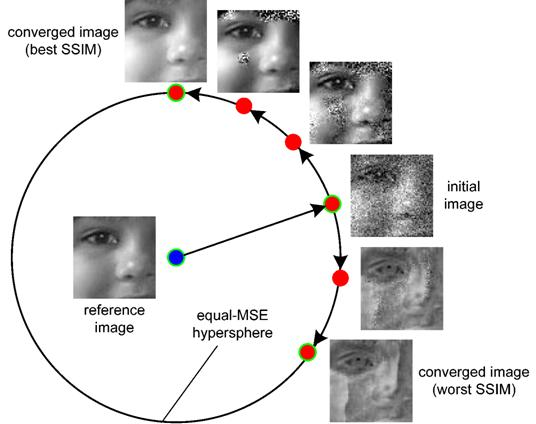

In [25]:
for file in os.listdir('images/'):
    
    # open target and reference images
    target = cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source images/{}'.format(file))
    
    # calculate score
    scores = compare_images(target, ref)

    # print all three scores with new line characters (\n) 
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

baboon.bmp
PSNR: 22.157084083442548
MSE: 1187.1161333333334
SSIM: 0.629277587900277

baby_GT.bmp
PSNR: 34.37180640966199
MSE: 71.28874588012695
SSIM: 0.9356987872724932

barbara.bmp
PSNR: 25.906629837568126
MSE: 500.65508535879627
SSIM: 0.8098632646406401

bird_GT.bmp
PSNR: 32.896644728720005
MSE: 100.12375819830247
SSIM: 0.9533644866026473

butterfly_GT.bmp
PSNR: 24.782076560337416
MSE: 648.6254119873047
SSIM: 0.8791344763843051

comic.bmp
PSNR: 23.799861502225532
MSE: 813.2338836565096
SSIM: 0.8347335416398209

face.bmp
PSNR: 30.99220650287191
MSE: 155.23189718546524
SSIM: 0.8008439492289884

flowers.bmp
PSNR: 27.454504805386147
MSE: 350.55093922651935
SSIM: 0.8697286286974628

foreman.bmp
PSNR: 30.14456532664372
MSE: 188.6883483270202
SSIM: 0.933268417388899

head_GT.bmp
PSNR: 31.020502848237534
MSE: 154.2237755102041
SSIM: 0.8011121330733371



AttributeError: 'NoneType' object has no attribute 'astype'

In [26]:
# define the SRCNN model
def SRCNN():
    model = Sequential()
    model.add(Conv2D(filters=128,kernel_size=(9,9),kernel_initializer='glorot_uniform',activation='relu',
                     padding='valid',use_bias=True,input_shape=(None,None,1)))
    
    model.add(Conv2D(filters=64,kernel_size=(3,3),kernel_initializer='glorot_uniform',activation='relu',
                     padding='same',use_bias=True))
    
    model.add(Conv2D(filters=1,kernel_size=(5,5),kernel_initializer='glorot_uniform',activation='linear',
                     padding='valid',use_bias=True))
    adam = Adam(lr=0.0003)
    
    model.compile(optimizer=adam,loss='mean_squared_error',metrics=['mean_squared_error'])
    
    return model   

In [27]:
srcnn = SRCNN()
srcnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, None, None, 128)   10496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, None, None, 64)    73792     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, None, None, 1)     1601      
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________


In [28]:
# define necessary image processing functions

def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img


In [29]:
def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = SRCNN()
    srcnn.load_weights('weights.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source images/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    
    # return images and scores
    return ref, degraded, output, scores

Degraded Image: 
PSNR: 24.752462626436284
MSE: 653.0634118967453
SSIM: 0.8788410517538944

Reconstructed Image: 
PSNR: 30.382141759863842
MSE: 178.64359079005544
SSIM: 0.9519721030434253



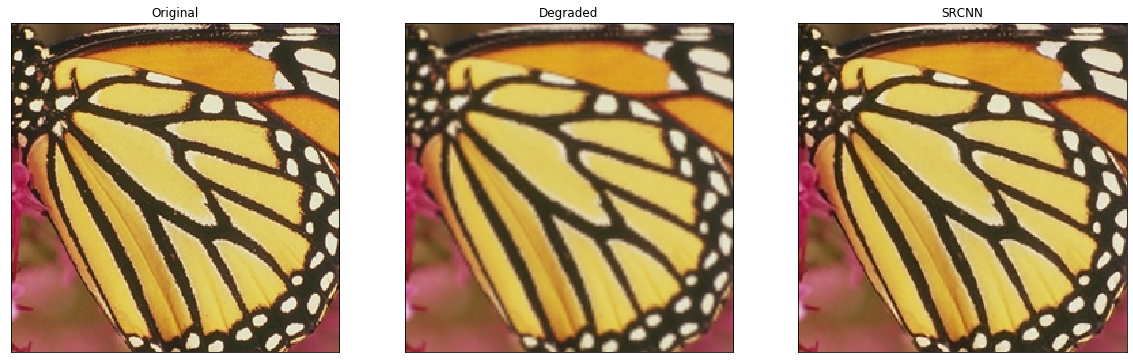

In [31]:
ref, degraded, output, scores = predict('images/butterfly_GT.bmp')

# print all scores for all images
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))


# display images as subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

# remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [15]:
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

Text(0.5, 1, 'Original')

In [16]:
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')

Text(0.5, 1, 'Degraded')

In [17]:
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

Text(0.5, 1, 'SRCNN')

In [32]:
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [33]:
for file in os.listdir('images'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))
    
    # display images as subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[1].set(xlabel = 'PSNR: {}\nMSE: {} \nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    axs[2].set(xlabel = 'PSNR: {} \nMSE: {} \nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))

    # remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
      
    print('Saving {}'.format(file))
    fig.savefig('Outputs/{}.png'.format(os.path.splitext(file)[0])) 
    plt.close()

Saving baboon.bmp
Saving baby_GT.bmp
Saving barbara.bmp
Saving bird_GT.bmp
Saving butterfly_GT.bmp
Saving comic.bmp
Saving face.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving head_GT.bmp


AttributeError: 'NoneType' object has no attribute 'shape'